# Black Friday


In [1]:
import math
import pandas as pd
import numpy as np
import warnings
import seaborn as sns
import matplotlib.pyplot as plt
import plotly.express as px
warnings.filterwarnings("ignore")
from sklearn.metrics import r2_score
from sklearn.metrics import mean_squared_error
from sklearn.feature_selection import chi2
from sklearn.feature_selection import SelectKBest
from sklearn.model_selection import train_test_split

### Store the dataset into DataFrame

In [2]:
df=pd.read_csv("train.csv")

### DataFrame related Information

In [3]:
df.shape

(550068, 12)

In [4]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3', 'Purchase'],
      dtype='object')

In [5]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
count,5.500680e+05,550068.000000,550068.000000,550068.000000,376430.000000,166821.000000,550068.000000
mean,1.003029e+06,8.076707,0.409653,5.404270,9.842329,12.668243,9263.968713
std,1.727592e+03,6.522660,0.491770,3.936211,5.086590,4.125338,5023.065394
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000,12.000000
25%,1.001516e+06,2.000000,0.000000,1.000000,5.000000,9.000000,5823.000000
50%,1.003077e+06,7.000000,0.000000,5.000000,9.000000,14.000000,8047.000000
75%,1.004478e+06,14.000000,1.000000,8.000000,15.000000,16.000000,12054.000000
max,1.006040e+06,20.000000,1.000000,20.000000,18.000000,18.000000,23961.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 12 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     550068 non-null  int64  
 1   Product_ID                  550068 non-null  object 
 2   Gender                      550068 non-null  object 
 3   Age                         550068 non-null  object 
 4   Occupation                  550068 non-null  int64  
 5   City_Category               550068 non-null  object 
 6   Stay_In_Current_City_Years  550068 non-null  object 
 7   Marital_Status              550068 non-null  int64  
 8   Product_Category_1          550068 non-null  int64  
 9   Product_Category_2          376430 non-null  float64
 10  Product_Category_3          166821 non-null  float64
 11  Purchase                    550068 non-null  int64  
dtypes: float64(2), int64(5), object(5)
memory usage: 50.4+ MB


### Data Cleaning

In [7]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,14.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,NaN,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,NaN,7969


### Null Values

In [8]:
(df.isnull().mean())*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            31.566643
Product_Category_3            69.672659
Purchase                       0.000000
dtype: float64

### Dropping Product_Category_3
#### This feature had 70 null data. 

In [9]:
df.drop(['Product_Category_3'],axis=1,inplace=True)
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,P00069042,F,0-17,10,A,2,0,3,NaN,8370
1,1000001,P00248942,F,0-17,10,A,2,0,1,6.0,15200
2,1000001,P00087842,F,0-17,10,A,2,0,12,NaN,1422
3,1000001,P00085442,F,0-17,10,A,2,0,12,14.0,1057
4,1000002,P00285442,M,55+,16,C,4+,0,8,NaN,7969


In [10]:
df[['Product_Category_2']]=df[['Product_Category_2']].replace(np.NAN,0.0)

In [11]:
(df.isnull().mean())*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
Purchase                      0.0
dtype: float64

#### Now, our DataFrame is free of NULL values.

### Duplicate Data

In [12]:
df[df.duplicated(keep=False)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase


In [13]:
len(df[df.duplicated(keep=False)])

0

#### There is no duplicate data in our DataFrame.

### Correlation Table

In [14]:
df.corr()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Purchase
User_ID,1.000000,-0.023971,0.020443,0.003825,0.003896,0.004716
Occupation,-0.023971,1.000000,0.024280,-0.007618,0.006712,0.020833
Marital_Status,0.020443,0.024280,1.000000,0.019888,0.001099,-0.000463
Product_Category_1,0.003825,-0.007618,0.019888,1.000000,-0.067877,-0.343703
Product_Category_2,0.003896,0.006712,0.001099,-0.067877,1.000000,0.052288
Purchase,0.004716,0.020833,-0.000463,-0.343703,0.052288,1.000000


#### No 2 columns are highly correlated.

### Data Types

In [15]:
df.dtypes

User_ID                         int64
Product_ID                     object
Gender                         object
Age                            object
Occupation                      int64
City_Category                  object
Stay_In_Current_City_Years     object
Marital_Status                  int64
Product_Category_1              int64
Product_Category_2            float64
Purchase                        int64
dtype: object

In [16]:
df=df.astype({'Product_Category_2':'int64'})

#### Converting Product_Category_2 from float 64 to int64.

In [17]:
df.dtypes

User_ID                        int64
Product_ID                    object
Gender                        object
Age                           object
Occupation                     int64
City_Category                 object
Stay_In_Current_City_Years    object
Marital_Status                 int64
Product_Category_1             int64
Product_Category_2             int64
Purchase                       int64
dtype: object

### Label Encoding
#### Encoding all the feature with dtype = object

In [18]:
from sklearn.preprocessing import LabelEncoder
label_encoder = LabelEncoder()

In [19]:
df['Product_ID'] = label_encoder.fit_transform(df['Product_ID'])
df['Gender'] = label_encoder.fit_transform(df['Gender'])
df['City_Category'] = label_encoder.fit_transform(df['City_Category'])
df['Age'] = label_encoder.fit_transform(df['Age'])
df['Stay_In_Current_City_Years'] = label_encoder.fit_transform(df['Stay_In_Current_City_Years'])

### Exploratory Data Analysis

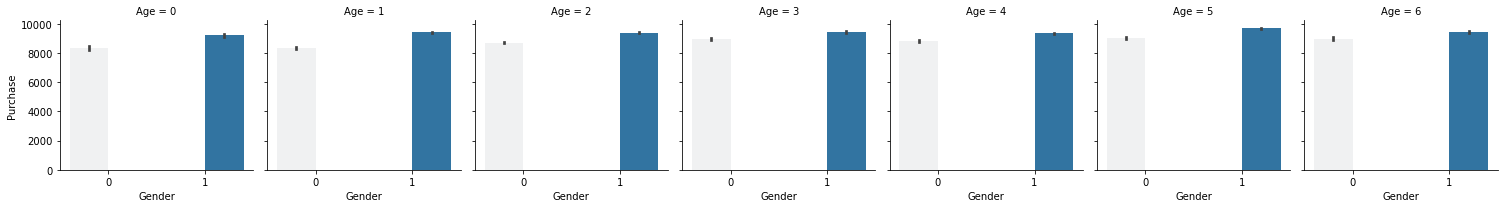

In [20]:
pl = sns.FacetGrid(df, col="Age")
pl.map(sns.barplot, "Gender", "Purchase", hue=df.Gender)

#### Bar plot showing customers who have either purchased or not based on their gender and age.

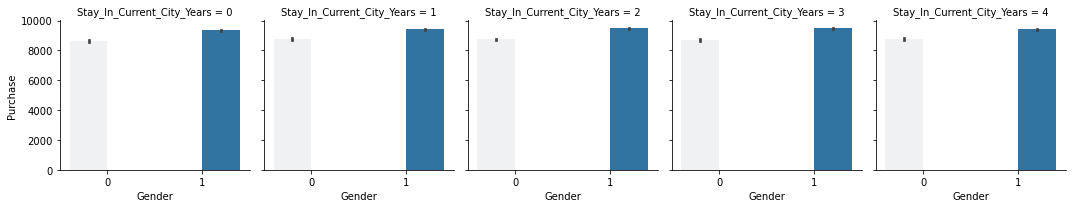

In [21]:
pl = sns.FacetGrid(df, col="Stay_In_Current_City_Years")
pl.map(sns.barplot, "Gender", "Purchase", hue=df.Gender)

#### Bar plot showing customers who have either purchased or not based on their gender and their Stay In Current City Years.

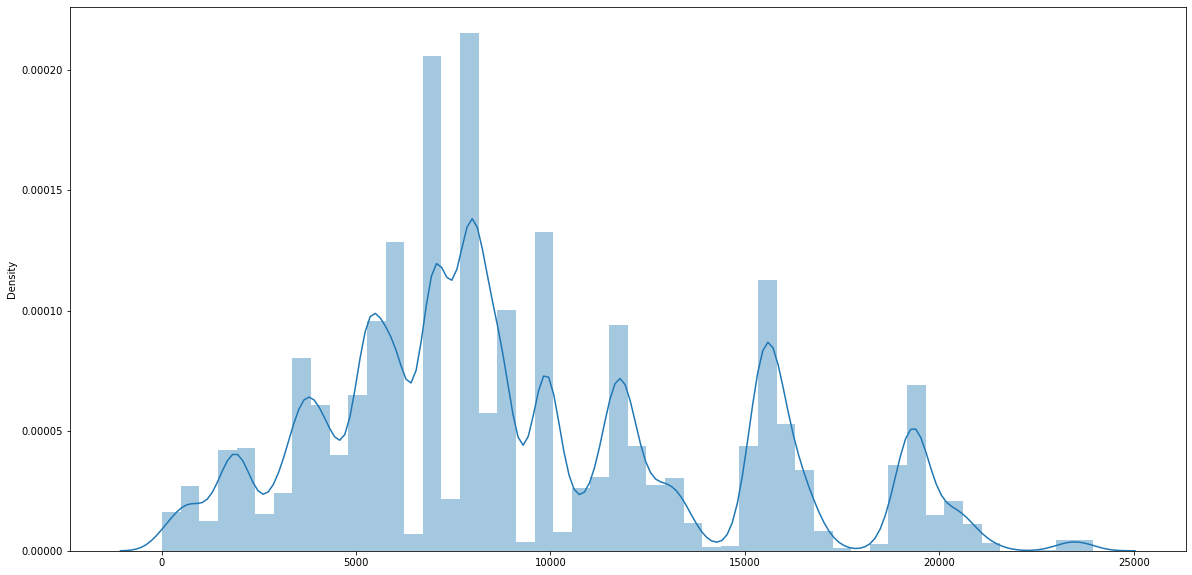

In [22]:
plt.subplots(figsize=(20,10))
sns.distplot(x = df.Purchase)
plt.show()

#### Looking at the graph, our data is slightly right skewed

In [23]:
df.Purchase.skew()

0.6001400037087128

In [24]:
df["Purchase"].kurtosis()

-0.3383775655851702

#### Looking at the graph we can say Purchase is right skewed

### Feature Engineering

In [25]:
df.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Purchase
0,1000001,672,0,0,10,0,2,0,3,0,8370
1,1000001,2376,0,0,10,0,2,0,1,6,15200
2,1000001,852,0,0,10,0,2,0,12,0,1422
3,1000001,828,0,0,10,0,2,0,12,14,1057
4,1000002,2734,1,6,16,2,4,0,8,0,7969


In [26]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 550068 entries, 0 to 550067
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     550068 non-null  int64
 1   Product_ID                  550068 non-null  int32
 2   Gender                      550068 non-null  int32
 3   Age                         550068 non-null  int32
 4   Occupation                  550068 non-null  int64
 5   City_Category               550068 non-null  int32
 6   Stay_In_Current_City_Years  550068 non-null  int32
 7   Marital_Status              550068 non-null  int64
 8   Product_Category_1          550068 non-null  int64
 9   Product_Category_2          550068 non-null  int64
 10  Purchase                    550068 non-null  int64
dtypes: int32(5), int64(6)
memory usage: 35.7 MB


### Normalization

In [27]:
# from sklearn.preprocessing import StandardScaler

# sstrain = StandardScaler()
# df_stand = sstrain.fit_transform(df)

In [28]:
# df.dtypes

In [29]:
df=df.astype({'Product_ID':'int64'})
df=df.astype({'Gender':'int64'})
df=df.astype({'City_Category':'int64'})
df=df.astype({'Age':'int64'})
df=df.astype({'Stay_In_Current_City_Years':'int64'})
df.dtypes

User_ID                       int64
Product_ID                    int64
Gender                        int64
Age                           int64
Occupation                    int64
City_Category                 int64
Stay_In_Current_City_Years    int64
Marital_Status                int64
Product_Category_1            int64
Product_Category_2            int64
Purchase                      int64
dtype: object

### Data Splitting

#### Since, our data was already divided into train and test, we will split train data into 2 parts in the ratio 80-20
* train data
* cross validation data

In [30]:
X = df.iloc[:,:-1]
X.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2'],
      dtype='object')

In [31]:
y = df.iloc[:,-1:]
y.columns

Index(['Purchase'], dtype='object')

In [32]:
X.shape, y.shape

((550068, 10), (550068, 1))

In [33]:
x_train, x_cv, y_train, y_cv = train_test_split(X, y, test_size=0.2, random_state=1)

* 80% train data
* 20% cross-validation data

In [34]:
[x_train.shape,y_train.shape]

[(440054, 10), (440054, 1)]

In [35]:
[x_cv.shape,y_cv.shape]

[(110014, 10), (110014, 1)]

### Feature Selection

### Mutual Information

In [36]:
from sklearn.feature_selection import mutual_info_regression

def make_mi_scores(X, y, discrete_features):
    MI_Score = mutual_info_regression(X, y, discrete_features=discrete_features)
    MI_Score = pd.Series(MI_Score, name="MI Scores", index=X.columns)
    MI_Score = MI_Score.sort_values(ascending=False)
    return MI_Score

In [37]:
features = X.dtypes == int
MI_Score = make_mi_scores(x_train, y_train, features)
MI_Score[::]

Product_Category_1            1.049819
Product_Category_2            0.097908
Product_ID                    0.037512
Age                           0.007583
Gender                        0.006133
City_Category                 0.005726
Occupation                    0.003219
Marital_Status                0.001810
Stay_In_Current_City_Years    0.000877
User_ID                       0.000000
Name: MI Scores, dtype: float64

#### Sorting features based on their importance.

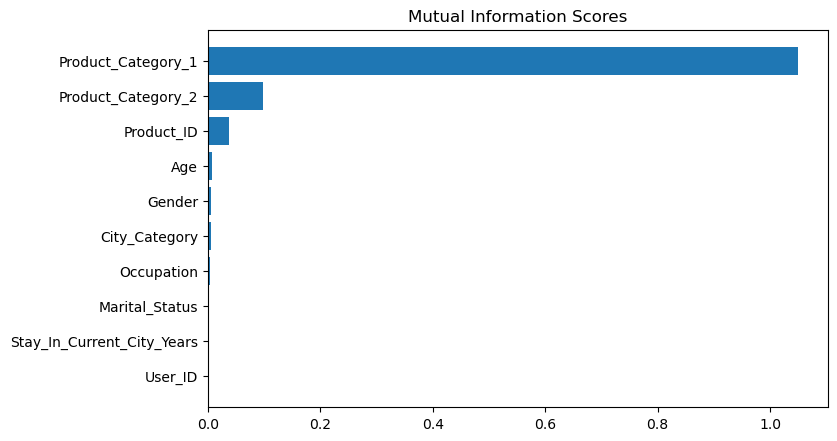

In [38]:
def plot_mi_scores(scores):
    scores = scores.sort_values(ascending=True)
    width = np.arange(len(scores))
    ticks = list(scores.index)
    plt.barh(width, scores)
    plt.yticks(width, ticks)
    plt.title("Mutual Information Scores")


plt.figure(dpi=100, figsize=(8, 5))
plot_mi_scores(MI_Score)

### Heatmap

In [39]:
x_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 440054 entries, 529969 to 128037
Data columns (total 10 columns):
 #   Column                      Non-Null Count   Dtype
---  ------                      --------------   -----
 0   User_ID                     440054 non-null  int64
 1   Product_ID                  440054 non-null  int64
 2   Gender                      440054 non-null  int64
 3   Age                         440054 non-null  int64
 4   Occupation                  440054 non-null  int64
 5   City_Category               440054 non-null  int64
 6   Stay_In_Current_City_Years  440054 non-null  int64
 7   Marital_Status              440054 non-null  int64
 8   Product_Category_1          440054 non-null  int64
 9   Product_Category_2          440054 non-null  int64
dtypes: int64(10)
memory usage: 36.9 MB


<AxesSubplot:>

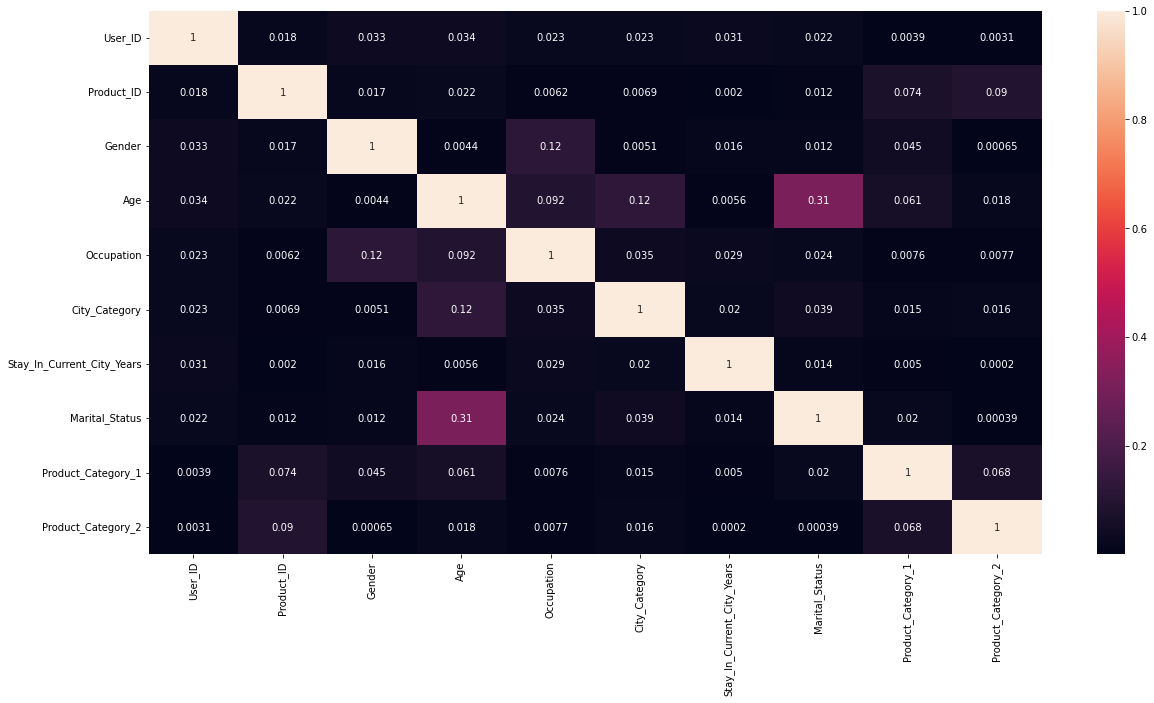

In [40]:
plt.figure(figsize=(20,10))
sns.heatmap(x_train.corr().abs(),annot=True)

### Modeling

#### Now we need to compare with different ML models, and need to find out the best predicted model
* Linear Regression
* Decision Tree Regression
* Random Forest Regression
* XG Boost Regression

In [41]:
MSE_Score = []
RMSE_Score = []
MSE_Score_cv = []
RMSE_Score_cv = []
Algorithm = []
R2_Score = []
R2_Score_cv = []

### Linear Regression

In [42]:
# from sklearn.linear_model import LinearRegression
# Algorithm.append('LinearRegression')
# regressor = LinearRegression()
# regressor.fit(x_train, y_train)
# predicted= regressor.predict(x_train)

In [43]:
# MSE_Score.append(mean_squared_error(y_train, predicted))
# mse = mean_squared_error(y_train, predicted)
# RMSE_Score.append(math.sqrt(mse))
# R2_Score.append(r2_score(y_train, predicted))

In [44]:
# predicted_cv = regressor.predict(x_cv)
# MSE_Score_cv.append(mean_squared_error(y_cv, predicted_cv))
# mse = mean_squared_error(y_cv, predicted_cv)
# RMSE_Score_cv.append(math.sqrt(mse))
# R2_Score_cv.append(r2_score(y_cv, predicted_cv))

In [45]:
# for i in Algorithm, MSE_Score, RMSE_Score, MSE_Score_cv, RMSE_Score_cv:
#     print(i,end=',')

### Decision Tree Regression

In [46]:
# from sklearn.tree import DecisionTreeRegressor
# Algorithm.append('DecisionTreeRegression')
# regressor_dt = DecisionTreeRegressor()
# regressor_dt.fit(x_train, y_train)
# predicted_dt= regressor_dt.predict(x_train)

In [47]:
# MSE_Score.append(mean_squared_error(y_train, predicted_dt))
# mse_dt = mean_squared_error(y_train, predicted_dt)
# RMSE_Score.append(math.sqrt(mse_dt))
# R2_Score.append(r2_score(y_train, predicted_dt))

In [48]:
# predicted_dt_cv = regressor_dt.predict(x_cv)
# MSE_Score_cv.append(mean_squared_error(y_cv, predicted_dt_cv))
# mse_dt = mean_squared_error(y_cv, predicted_dt_cv)
# RMSE_Score_cv.append(math.sqrt(mse_dt))
# R2_Score_cv.append(r2_score(y_cv, predicted_dt_cv))

In [49]:
# for i in Algorithm, MSE_Score, RMSE_Score, MSE_Score_cv, RMSE_Score_cv:
#     print(i,end=',')

### Random Forest Regression

In [50]:
# from scipy.stats import loguniform
# from pandas import read_csv
# from sklearn.linear_model import Ridge
# from sklearn.linear_model import LinearRegression
# from sklearn.model_selection import RepeatedKFold
# from sklearn.model_selection import RandomizedSearchCV

In [51]:
# from sklearn.model_selection import RandomizedSearchCV
# from pprint import pprint
# from sklearn.ensemble import RandomForestRegressor

# regressor_rf = RandomForestRegressor()
# # Number of trees in random forest
# n_estimators = [int(x) for x in np.linspace(start = 20, stop = 200, num = 5)]
# # Number of features to consider at every split
# max_features = ['auto', 'sqrt']
# # Maximum number of levels in tree
# max_depth = [int(x) for x in np.linspace(1, 45, num = 3)]
# # Minimum number of samples required to split a node
# min_samples_split = [5, 10]

# # Create the random grid
# random_grid = {'n_estimators': n_estimators,
#                'max_features': max_features,
#                'max_depth': max_depth,
#                'min_samples_split': min_samples_split}

# pprint(random_grid)


In [52]:
# rf_random = RandomizedSearchCV(estimator = regressor_rf, param_distributions = random_grid, n_iter = 10, cv = 10, verbose=2, random_state=42, n_jobs = -1, scoring='neg_mean_squared_error')
# # Fit the random search model
# rf_random.fit(x_train, y_train)

In [53]:
# cvres2 = rf_random.cv_results_
# for mean_score, params in zip(cvres2["mean_test_score"], cvres2["params"]):
#     print(np.sqrt(-mean_score), params)

In [54]:
# rf_random.best_estimator_

In [55]:
# rf_random.best_params_

In [56]:
# from sklearn.ensemble import RandomForestRegressor
# Algorithm.append('RandomForestRegressor')
# # RandomForestRegressor(max_depth=45, max_features='sqrt', min_samples_split=10, n_estimators=110)
# regressor_rf = RandomForestRegressor(bootstrap = True, max_depth = 75, max_features = 'auto', min_samples_leaf = 4, min_samples_split = 10, n_estimators = 400)
# regressor_rf.fit(x_train, y_train)
# predicted_rf = regressor_rf.predict(x_train)

In [57]:
# MSE_Score.append(mean_squared_error(y_train, predicted_rf))
# mse_rf = mean_squared_error(y_train, predicted_rf)
# RMSE_Score.append(math.sqrt(mse_rf))
# R2_Score.append(r2_score(y_train, predicted_rf))

In [58]:
# predicted_rf_cv = regressor_rf.predict(x_cv)
# MSE_Score_cv.append(mean_squared_error(y_cv, predicted_rf_cv))
# mse_rf = mean_squared_error(y_cv, predicted_rf_cv)
# RMSE_Score_cv.append(math.sqrt(mse_rf))
# R2_Score_cv.append(r2_score(y_cv, predicted_dt_cv))

In [59]:
# for i in Algorithm, MSE_Score, RMSE_Score, MSE_Score_cv, RMSE_Score_cv:
#     print(i,end=',')

### XG BOOST

In [60]:
import xgboost as xgb
Algorithm.append('XGB Regressor')
# regressor_xg = xgb.XGBRegressor(max_depth=5 ,learning_rate=0.2 ,n_estimators=140)
regressor_xg = xgb.XGBRegressor(booster='gbtree', max_depth=6, learning_rate=0.1, n_estimators=1000)
regressor_xg.fit(x_train, y_train)
predicted = regressor_xg.predict(x_train)

In [61]:
MSE_Score.append(mean_squared_error(y_train, predicted))
mse_xg = mean_squared_error(y_train, predicted)
RMSE_Score.append(math.sqrt(mse_xg))
R2_Score.append(r2_score(y_train, predicted))

In [62]:
predicted_xg_cv = regressor_xg.predict(x_cv)
MSE_Score_cv.append(mean_squared_error(y_cv, predicted_xg_cv))
mse_xg = mean_squared_error(y_cv, predicted_xg_cv)
RMSE_Score_cv.append(math.sqrt(mse_xg))
R2_Score_cv.append(r2_score(y_cv, predicted_xg_cv))

In [63]:
for i in Algorithm, MSE_Score, RMSE_Score, MSE_Score_cv, RMSE_Score_cv:
    print(i,end=',')

['XGB Regressor'],[5816475.623643943],[2411.7370552454395],[6373193.334797114],[2524.518436216522],

### Comparison List

In [64]:
comp = pd.DataFrame(list(zip(Algorithm, RMSE_Score, RMSE_Score_cv, R2_Score, R2_Score_cv)), columns =['Algorithm', 'RMSE_Score_Train', 'RMSE_Score_cv', 'R2_Score', 'R2_Score_cv']) 
comp.head(1111)

,Algorithm,RMSE_Score_Train,RMSE_Score_cv,R2_Score,R2_Score_cv
0,XGB Regressor,2411.737055,2524.518436,0.769258,0.748342


### Test Data

In [65]:
df=pd.read_csv("test.csv")

In [66]:
x_test = df.copy()

### DataFrame related Information

In [67]:
df.shape

(233599, 11)

In [68]:
df.columns

Index(['User_ID', 'Product_ID', 'Gender', 'Age', 'Occupation', 'City_Category',
       'Stay_In_Current_City_Years', 'Marital_Status', 'Product_Category_1',
       'Product_Category_2', 'Product_Category_3'],
      dtype='object')

In [69]:
df.describe()

,User_ID,Occupation,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3
count,2.335990e+05,233599.000000,233599.000000,233599.000000,161255.000000,71037.000000
mean,1.003029e+06,8.085407,0.410070,5.276542,9.849586,12.669454
std,1.726505e+03,6.521146,0.491847,3.736380,5.094943,4.125944
min,1.000001e+06,0.000000,0.000000,1.000000,2.000000,3.000000
25%,1.001527e+06,2.000000,0.000000,1.000000,5.000000,9.000000
50%,1.003070e+06,7.000000,0.000000,5.000000,9.000000,14.000000
75%,1.004477e+06,14.000000,1.000000,8.000000,15.000000,16.000000
max,1.006040e+06,20.000000,1.000000,18.000000,18.000000,18.000000


In [70]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 233599 entries, 0 to 233598
Data columns (total 11 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   User_ID                     233599 non-null  int64  
 1   Product_ID                  233599 non-null  object 
 2   Gender                      233599 non-null  object 
 3   Age                         233599 non-null  object 
 4   Occupation                  233599 non-null  int64  
 5   City_Category               233599 non-null  object 
 6   Stay_In_Current_City_Years  233599 non-null  object 
 7   Marital_Status              233599 non-null  int64  
 8   Product_Category_1          233599 non-null  int64  
 9   Product_Category_2          161255 non-null  float64
 10  Product_Category_3          71037 non-null   float64
dtypes: float64(2), int64(4), object(5)
memory usage: 19.6+ MB


#### In the test dataset, there is no target variable.

### Data Cleaning

In [71]:
(df.isnull().mean())*100

User_ID                        0.000000
Product_ID                     0.000000
Gender                         0.000000
Age                            0.000000
Occupation                     0.000000
City_Category                  0.000000
Stay_In_Current_City_Years     0.000000
Marital_Status                 0.000000
Product_Category_1             0.000000
Product_Category_2            30.969311
Product_Category_3            69.590195
dtype: float64

In [72]:
df.drop("Product_Category_3", axis=1, inplace=True)

#### Since the field have approx 70% null values, it could be mis-leading

In [73]:
df['Product_Category_2'] = df['Product_Category_2'].replace(np.nan, 0)

In [74]:
(df.isnull().mean())*100

User_ID                       0.0
Product_ID                    0.0
Gender                        0.0
Age                           0.0
Occupation                    0.0
City_Category                 0.0
Stay_In_Current_City_Years    0.0
Marital_Status                0.0
Product_Category_1            0.0
Product_Category_2            0.0
dtype: float64

### Duplicate Date

In [75]:
df[df.duplicated(keep=False)]

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2


In [76]:
len(df[df.duplicated(keep=False)])

0

### Label Encodig

In [77]:
label_encoder.fit(df["City_Category"])
df['City_Category'] = label_encoder.transform(df['City_Category'])

label_encoder.fit(df["Occupation"])
df['Occupation'] = label_encoder.transform(df['Occupation'])

label_encoder.fit(df["Gender"])
df['Gender'] = label_encoder.transform(df['Gender'])

label_encoder.fit(df["Product_ID"])    
df['Product_ID'] = label_encoder.transform(df['Product_ID'])

label_encoder.fit(df["Age"])    
df['Age'] = label_encoder.transform(df['Age'])

label_encoder.fit(df["Stay_In_Current_City_Years"])    
df['Stay_In_Current_City_Years'] = label_encoder.transform(df['Stay_In_Current_City_Years'])

### Modeling

#### XG Boost was giving the most stable model so we will proceed with XG Boost

In [78]:
predicted = regressor_xg.predict(df)

### Prediction

In [79]:
final_result = pd.Series(predicted,name='Purchase')

In [80]:
final_result.head()

0    13143.686523
1    11424.450195
2     6584.332031
3     2849.675781
4     1221.047363
Name: Purchase, dtype: float32

### Merge x_train & y_train

In [81]:
x_test['Purchase']=final_result

In [82]:
x_test.head()

,User_ID,Product_ID,Gender,Age,Occupation,City_Category,Stay_In_Current_City_Years,Marital_Status,Product_Category_1,Product_Category_2,Product_Category_3,Purchase
0,1000004,P00128942,M,46-50,7,B,2,1,1,11.0,NaN,13143.686523
1,1000009,P00113442,M,26-35,17,C,0,0,3,5.0,NaN,11424.450195
2,1000010,P00288442,F,36-45,1,B,4+,1,5,14.0,NaN,6584.332031
3,1000010,P00145342,F,36-45,1,B,4+,1,4,9.0,NaN,2849.675781
4,1000011,P00053842,F,26-35,1,C,1,0,4,5.0,12.0,1221.047363


In [83]:
x_test.shape

(233599, 12)

### Store this dataframe into the .csv format

In [84]:
x_test.to_csv('15412_SUBMIT.csv')